In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
#import plotly.express as px
import seaborn as sns
from sklearn.metrics import mean_squared_error
import umap.umap_ as umap
import keras
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.preprocessing import minmax_scale


In [3]:
# load data
URL = "hotel_bookings_ohe.csv"
df_ = pd.read_csv(URL)
# df_.head()
# df_.shape

In [4]:
# reduce y column
Y = df_.iloc[:,df_.shape[1]-1]
dim_x = df_.shape[1]-1
df = df_.iloc[:,0:dim_x]
# df.head()

# std
df_std = (df - df.mean())/(df.std())
# df_std.head()

## PCA 

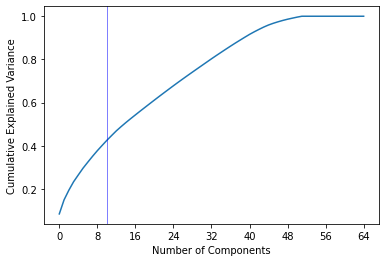

/nfs/home/wze8136/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


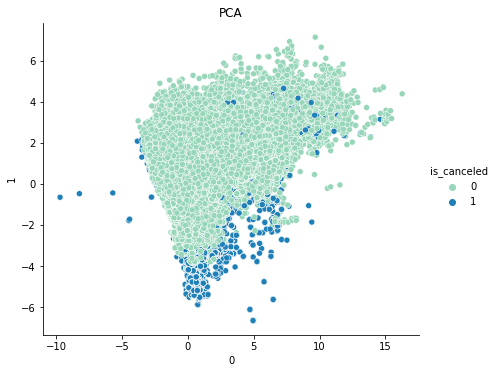

Reconstruction error: 2.4262816531242574e-30


In [6]:
# PCA -- plot -> find # of components
ax = plt.figure().gca()
pca = PCA().fit(df_std)

# graph -> Number of Components vs Cumulative Explained Variance
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.axvline(x=10, linewidth=1, color='b', alpha=0.5)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# built PCA with the around 90% CEV
df_pca = PCA(n_components=40).fit_transform(df_std)
df_pca = pd.DataFrame(data = df_pca)
df_pca = pd.concat([df_pca.reset_index().drop(['index'],axis=1),Y.reset_index().drop(['index'],axis=1)], axis=1)
df_pca.head()

# graph PCA
sns.pairplot(x_vars=0, y_vars=1, data=df_pca, hue="is_canceled",palette="YlGnBu",size=5,aspect=1.2)
plt.title('PCA')  
plt.show()

# reconstruction error

# Reconstruct data from the reduced representation
X_reconstructed = pca.inverse_transform(pca.transform(df_std))

# Calculate reconstruction error
reconstruction_error = mean_squared_error(df_std, X_reconstructed)

print(f"Reconstruction error: {reconstruction_error}")

## AUTOENCODER

In [ ]:
# scale data to auencoder
sData = minmax_scale(df_, axis = 0) 
num_principleComponent = 10

In [ ]:
# Define the input shape
input_shape = (sData.shape[1],)

# Define the encoding dimension
encoding_dim = num_principleComponent

# Define the input layer
input_data = Input(shape=input_shape)

# Define the encoder layers
encoded = Dense(20, activation='relu')(input_data)
encoded = Dense(10, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Define the decoder layers
decoded = Dense(10, activation='relu')(encoded)
decoded = Dense(20, activation='relu')(decoded)
decoded = Dense(input_shape[0], activation='sigmoid')(decoded)

# Define the autoencoder model
autoencoder = Model(inputs=input_data, outputs=decoded)

# Define the encoder model
encoder = Model(inputs=input_data, outputs=encoded)

# Define the decoder model
encoded_input = Input(shape=(encoding_dim,))
decoder_layer1 = autoencoder.layers[-3]
decoder_layer2 = autoencoder.layers[-2]
decoder_layer3 = autoencoder.layers[-1]
decoder = Model(inputs=encoded_input, outputs=decoder_layer3(decoder_layer2(decoder_layer1(encoded_input))))

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Train the model
autoencoder.fit(sData, sData, epochs=50, batch_size=32, shuffle=True)

# Use the encoder to get the reduced dimension representation of the data
encoded_data = pd.DataFrame(encoder.predict(sData))

# Print the shape of the reduced dimension representation
print(encoded_data.shape)

In [ ]:
#the quality check of dimension reduction 
#A lower reconstruction error indicates a better quality of dimensionality reduction.

# Evaluate the autoencoder on the same data used for training to get the reconstruction error
loss = autoencoder.evaluate(sData, sData)
print("Reconstruction error:", loss)

In [ ]:
encoded_data

## Visualization (TSNE, UMAP)

## TSNE

In [1]:
# tsne for visualization with 2d ( could be 3d if needed )
df_tsne = TSNE(n_components=2 , perplexity=20, random_state=0).fit_transform(df_std)
df_tsne = pd.DataFrame(data = df_tsne)
df_tsne = pd.concat([df_tsne.reset_index().drop(['index'],axis=1),Y.reset_index().drop(['index'],axis=1)], axis=1)

sns.pairplot(x_vars=0, y_vars=1, data=df_tsne, hue="is_canceled",palette="YlGnBu",size=5,aspect=1.2)
plt.title('T-SNE')
plt.show()

NameError: name 'TSNE' is not defined

## UMAP

/nfs/home/wze8136/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


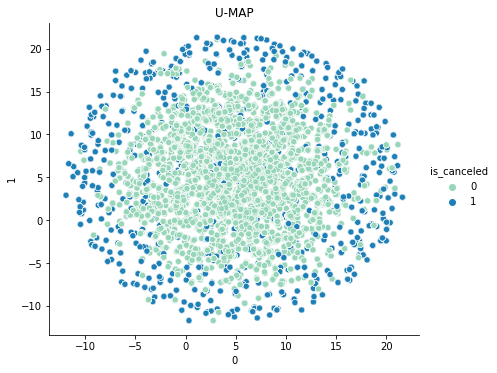

In [53]:
# UMAP for visualization with 2d ( could be 3d if needed )
umap_2d = umap.UMAP(n_components=2, init='random', random_state=0).fit_transform(df_std)
proj_2d = pd.DataFrame(data = umap_2d)
proj_2d = pd.concat([proj_2d.reset_index().drop(['index'],axis=1),Y.reset_index().drop(['index'],axis=1)], axis=1)

sns.pairplot(x_vars=0, y_vars=1, data=proj_2d, hue="is_canceled",palette="YlGnBu",size=5,aspect=1.2)
plt.title('U-MAP')
plt.show()